In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import dask.dataframe as dd

column_names = ["Inode (file unique ID)",
"KB Allocated",
"File Size",
"Creation Time in days from today",
"Change Time in days from today",
"Modification time in days from today",
"Acces time in days from today",
"GID numeric ID for the group owner of the file",
"UID numeric ID for the owner of the file"]
ddf = dd.read_csv("/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23",header=None, names = column_names, sep=" ")


In [3]:
ddf.head()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
0,100663296,0,8,1447,1447,3131,1447,2035,762231
1,100663297,0,188,1447,1447,1937,1447,2010,614955
2,100663301,0,567,1447,1447,3142,1447,2035,762231
3,100663304,0,87,1447,1447,3142,1447,2035,762231
4,100663306,0,1689,1447,1447,1937,1447,2010,614955


In [4]:
ddf.describe()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
npartitions=1,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...


In [5]:
# print(ddf.describe().compute())
# print(ddf.corr().compute())

In [6]:
# Sample approximately 10% of the rows without replacement
approx_total_rows = 14e6  # Approximate total number of rows in ddf
desired_sample_size = 100
frac = desired_sample_size / approx_total_rows

sampled_ddf = ddf.sample(frac=frac, replace=False)

In [7]:
# To compute and get the sampled data as a pandas dataframe (be cautious with memory usage)
sampled_pdf = sampled_ddf.compute()
sampled_pdf

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
383856,101129037,64,29477,1447,1447,1920,1322,2003,785573
1161041,102067069,64,7825,1447,1447,3198,1446,2035,762231
155498,100854960,0,288,1447,1447,3131,1447,2035,762231
21768,100691000,64,9789,1447,1447,2665,1447,2392,831677
1186304,102099051,0,563,1447,1447,1520,1446,2010,841154
...,...,...,...,...,...,...,...,...,...
988865,227755683811,64,13008,839,839,1904,471,2023,760443
22216,227754258038,0,219,839,839,2889,470,2008,804448
900980,227755543215,64,6746,839,839,1874,469,2030,816083
1157291,227755928452,64,14375,839,839,1904,470,2023,760443


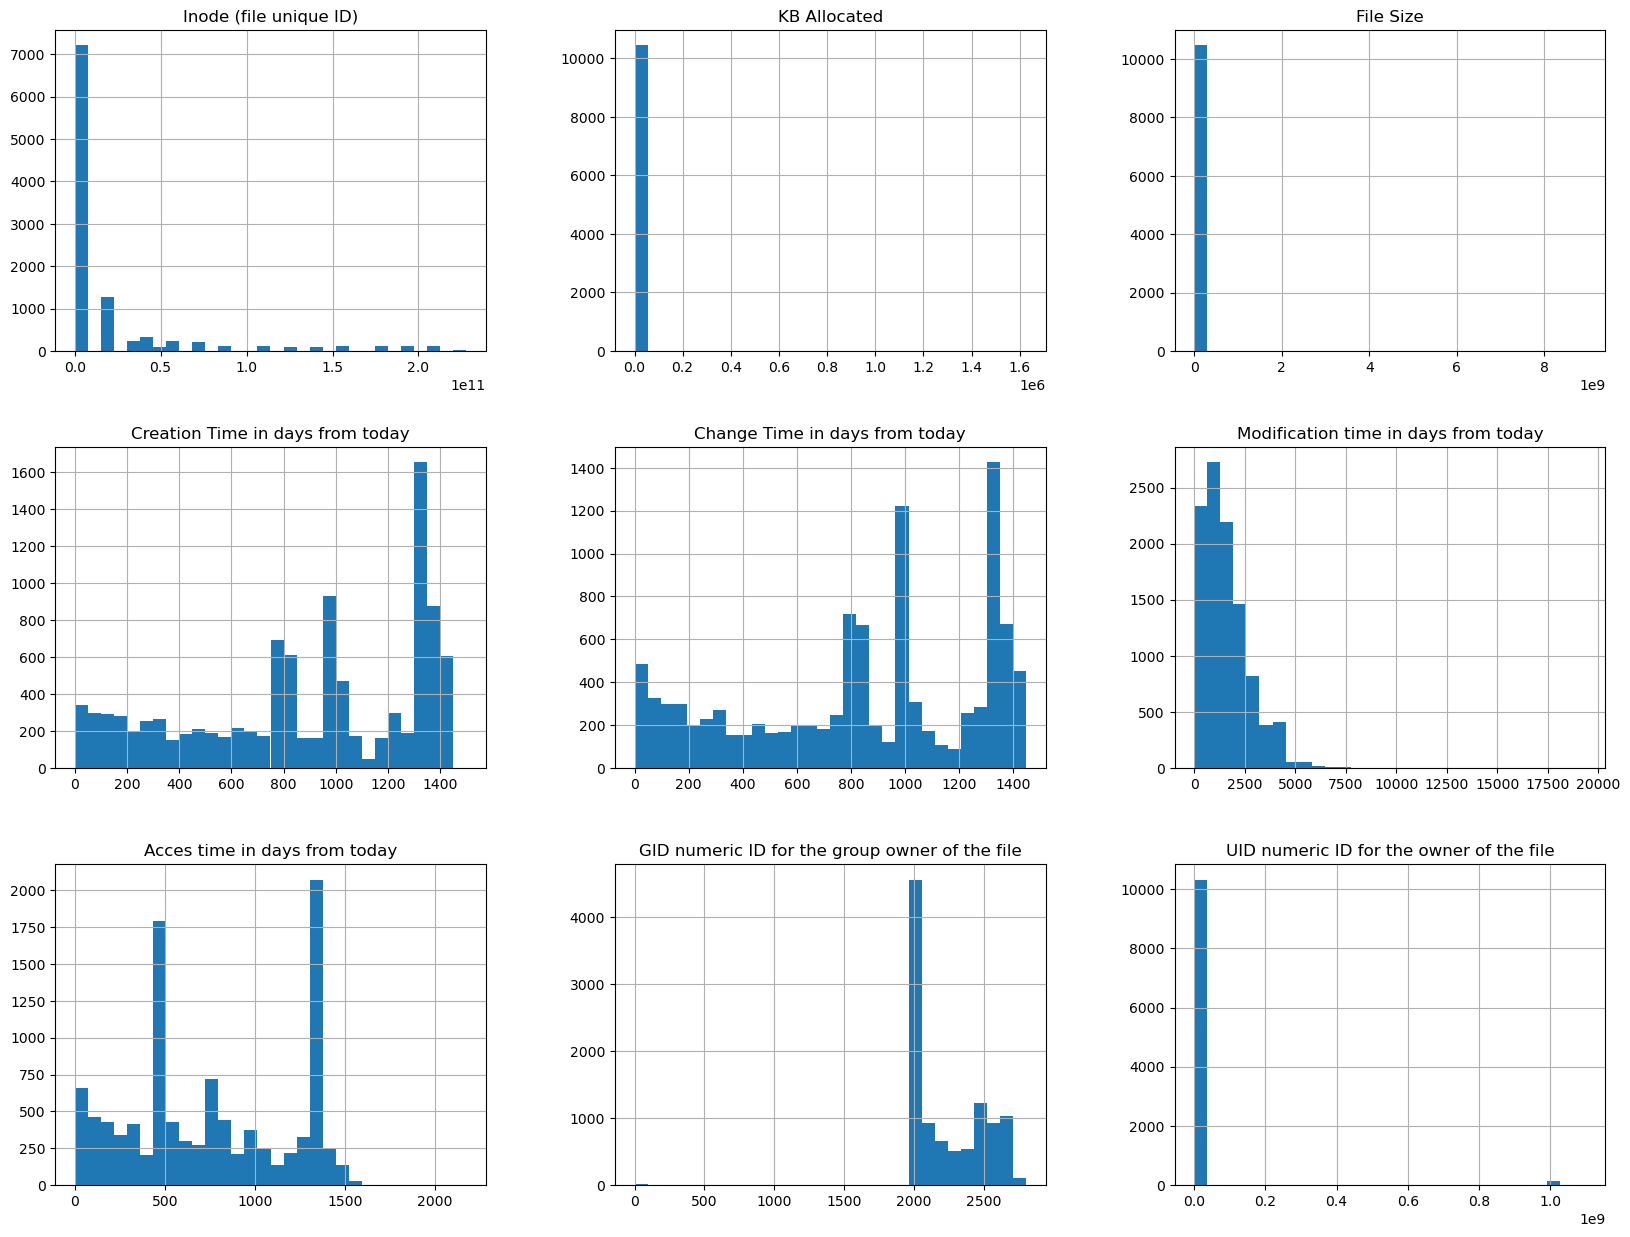

In [48]:
# histogram for each feature in the dataset
sampled_pdf.hist(bins=30, figsize=(20, 15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

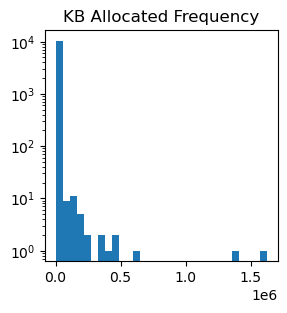

In [46]:
plt.figure(figsize=(3,3))
plt.hist(sampled_pdf["KB Allocated"], bins=30, log=True)
plt.title("KB Allocated Frequency")
plt.show

In [29]:
correlation_matrix= sampled_pdf.corr()

<Axes: >

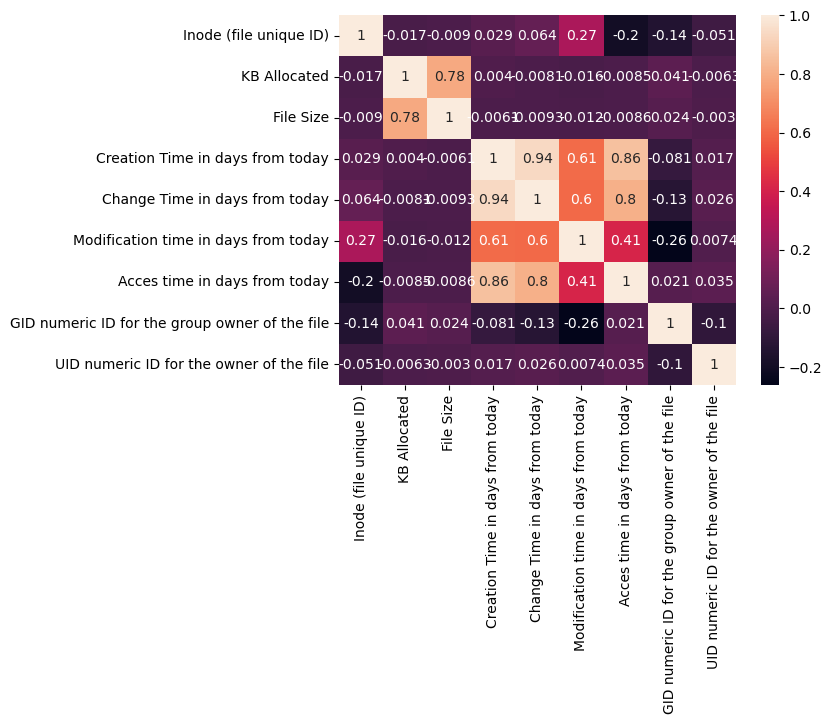

In [30]:
sns.heatmap(correlation_matrix, annot=True)

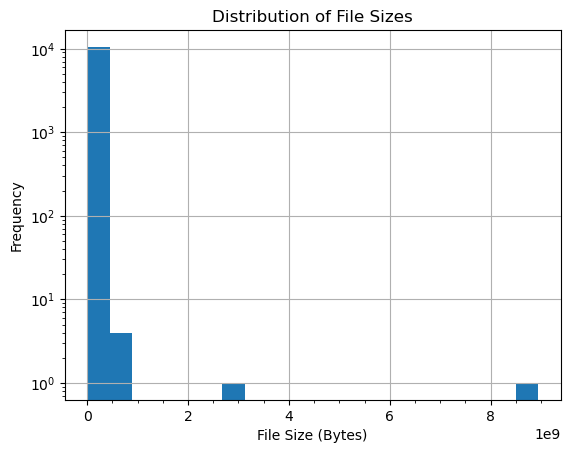

In [72]:
import matplotlib.ticker as ticker

sampled_pdf['File Size'].hist(bins=20, log=True)
plt.title('Distribution of File Sizes')
plt.xlabel('File Size (Bytes)')
plt.ylabel('Frequency')
# Adjusting the x-axis ticks to show more numbers
ax = plt.gca()  # Get the current Axes instance

# Set major and minor ticks locator
ax.xaxis.set_major_locator(ticker.AutoLocator())  # Auto locate the ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=4))  # Add minor ticks, 'n' is the number of subdivisions

plt.show()

## Are there common patterns in terms of users' data utilization? (Considering file size, creation time, change/modification time, and access times.)

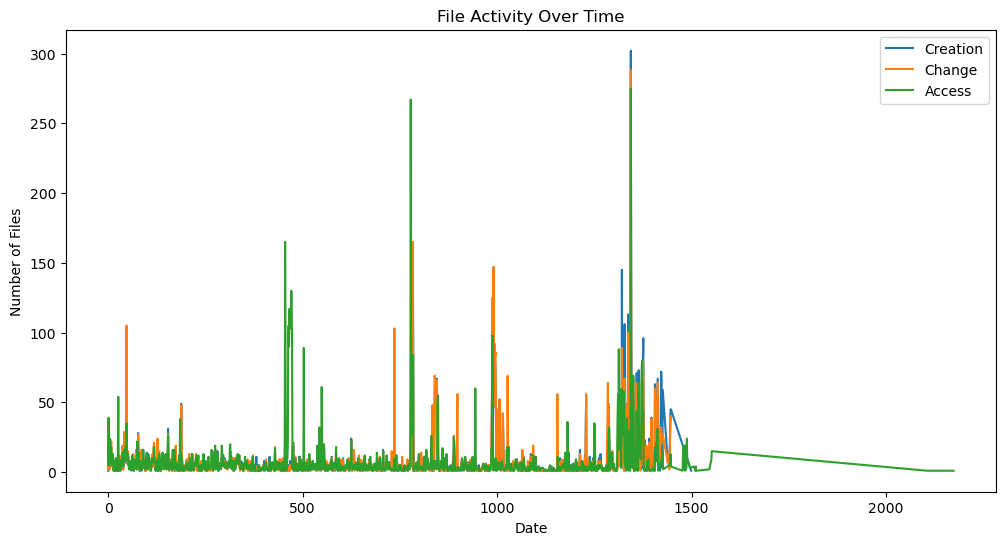

In [54]:
plt.figure(figsize=(12, 6))

# Plot creation time
sampled_pdf['Creation Time in days from today'].value_counts().sort_index().plot(label='Creation')

# Plot modification time
sampled_pdf['Change Time in days from today'].value_counts().sort_index().plot(label='Change')

# Plot access time
sampled_pdf['Acces time in days from today'].value_counts().sort_index().plot(label='Access')

plt.title('File Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Files')
plt.legend()
plt.show()


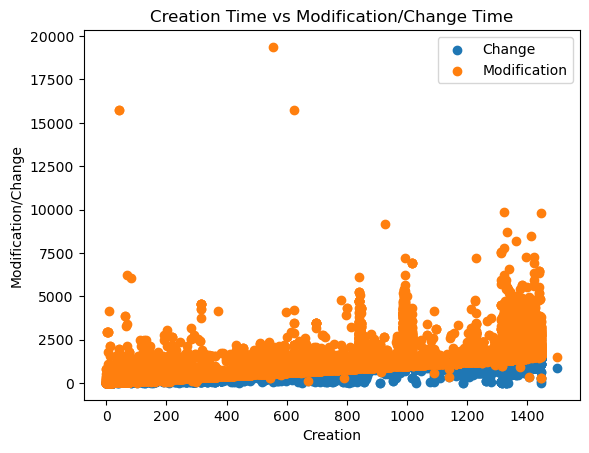

In [60]:
# creation time vs change time
plt.scatter(sampled_pdf['Creation Time in days from today'],sampled_pdf["Change Time in days from today"], label='Change')

# creation time vs modification time
plt.scatter(sampled_pdf['Creation Time in days from today'],sampled_pdf["Modification time in days from today"],label='Modification')

plt.title('Creation Time vs Modification/Change Time')
plt.xlabel('Creation')
plt.ylabel('Modification/Change')
plt.legend()
plt.show()

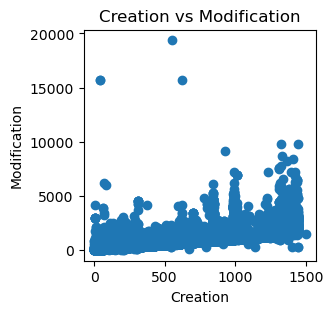

In [70]:
plt.figure(figsize=(3,3))
plt.scatter(sampled_pdf['Creation Time in days from today'],sampled_pdf["Modification time in days from today"])
plt.title('Creation vs Modification')
plt.xlabel('Creation')
plt.ylabel('Modification')
plt.show()